3.6.9
3.370776127460013e-09
3.341613357054047e-09
3.3406776317040922e-09
3.3227769538372626e-09
3.808785555518438e-09
3.3317088020533356e-09
6.642498004020564e-09
3.3857433285946637e-09
3.6562405514971146e-09
6.691835932170542e-09
3.3486350021518498e-09
4.556578613944158e-09
6.438112051732086e-09
3.3257651364295804e-09
5.300223532474035e-09
6.0185744012183866e-09
7.660704120672352e-10
5.9268502785201065e-09
5.4363359127878196e-09
1.0491186862555764e-09


/home/jackieyao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


6.325587086402799e-09
4.720111307681291e-09
2.1039531051085224e-09
6.577475623777416e-09
3.851775050891529e-09
3.2363776157335253e-09
6.657748854088529e-09
3.4176093228078617e-09
4.072350043355349e-09
6.528123087773502e-09
3.309577074837307e-09
4.889518588942176e-09
6.208184867612234e-09
3.368969727496521e-09
3.4326801874404224e-09
3.365345385711842e-09
3.3624438924803875e-09
3.340853450247794e-09
3.3543808475197072e-09
3.330723405094234e-09
3.331893739017221e-09
3.3294757870393804e-09
3.3015523248952553e-09
3.304582410987109e-09
3.3237448029041176e-09
1.453721704847035e-09
8.469796254713919e-10
8.448778771244491e-10
speed of light in vacuum 299694109.563299
speed of light in media (9989803.652109968+0j)
frequency =  9365440923.853092
propagation const =  5890.486225480861j
intrinsic impedance =  (11298.201755138336+0j)
tranmission coef =  (1.9354201472278498+0j)
reflection coef = (0.9354201472278498+0j)
observation time point 250
observation point z = 0.1
attenuation term =  1.0


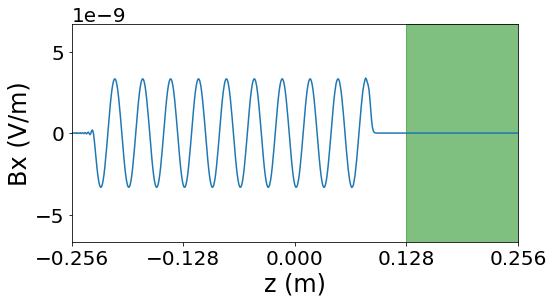

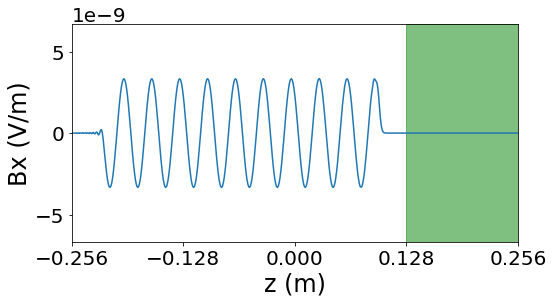

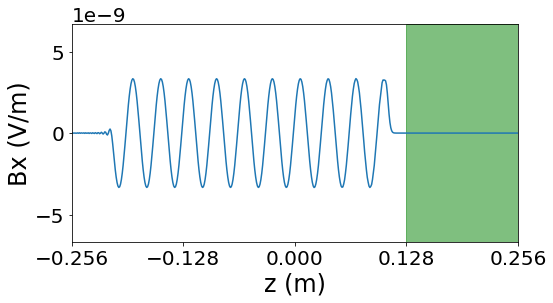

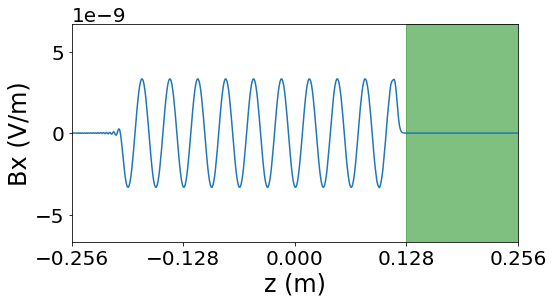

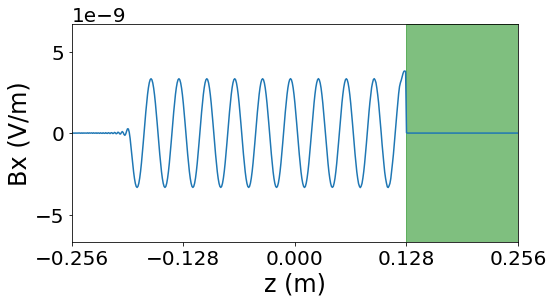

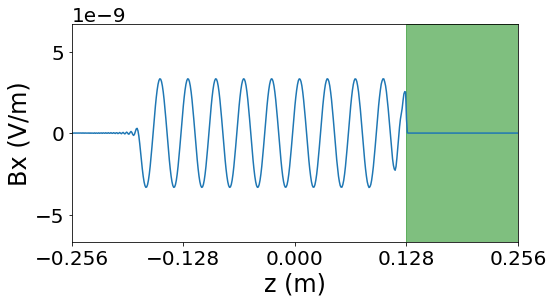

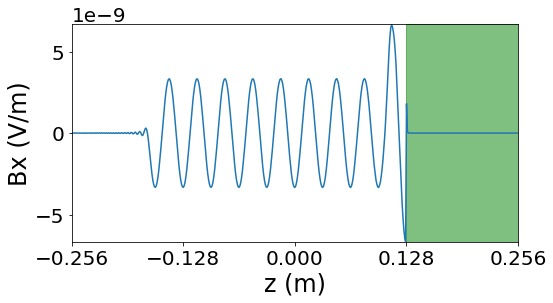

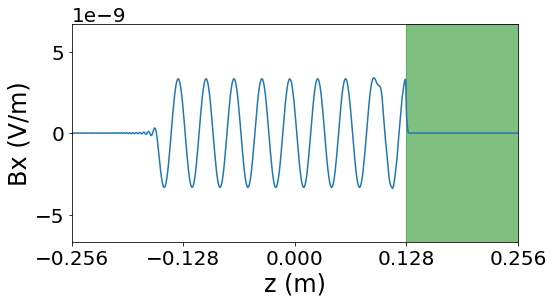

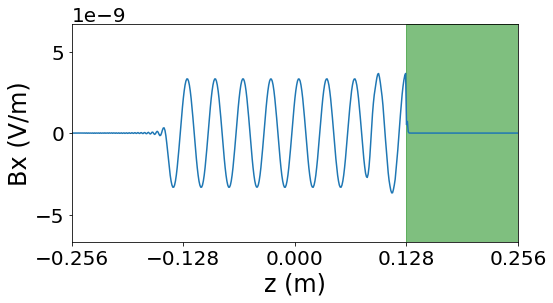

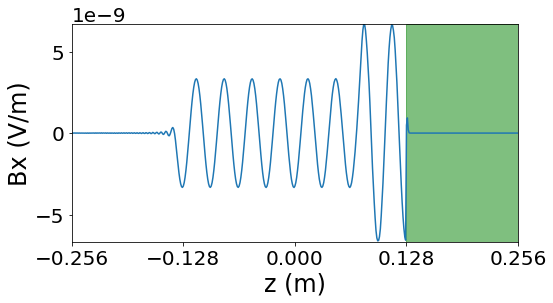

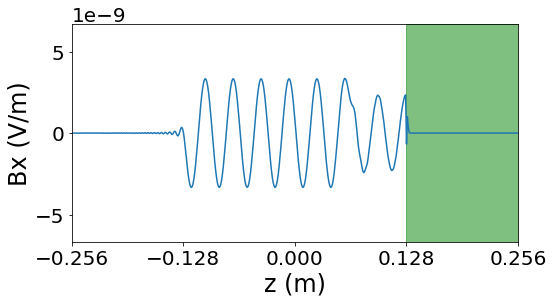

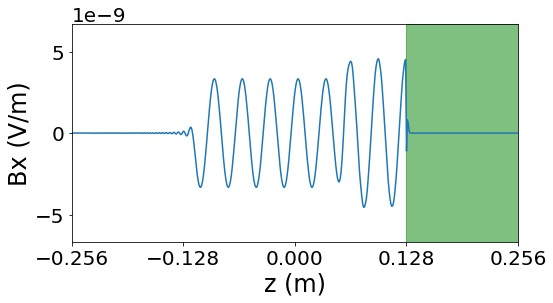

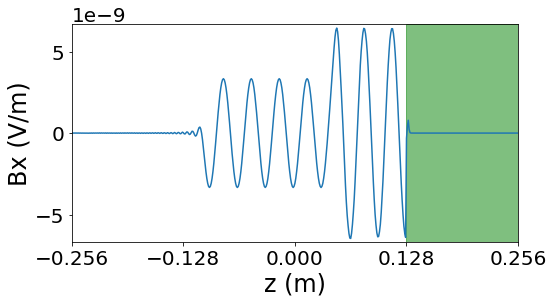

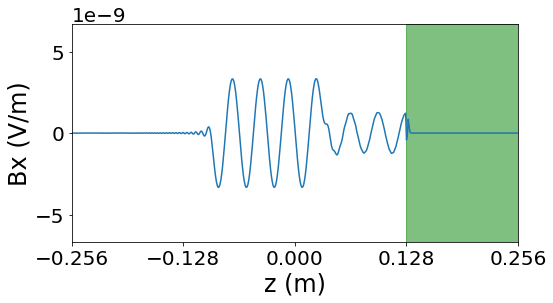

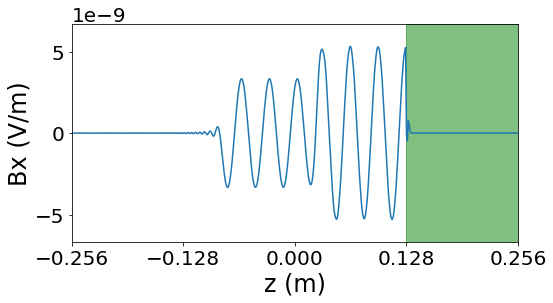

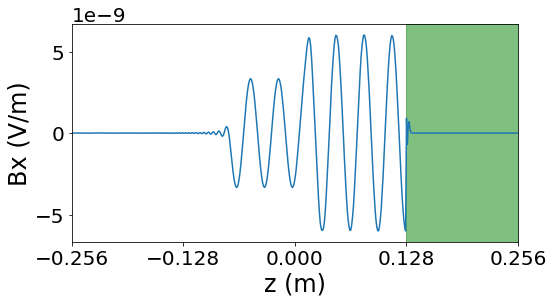

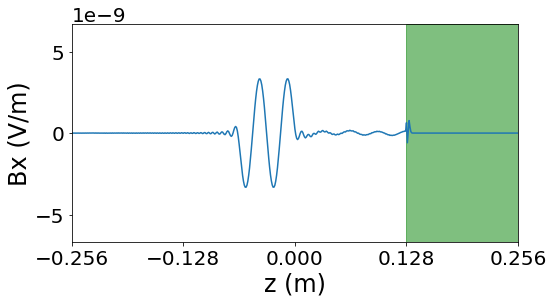

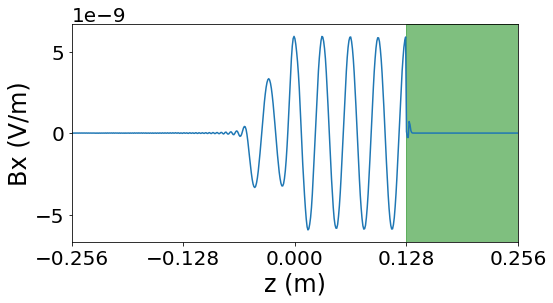

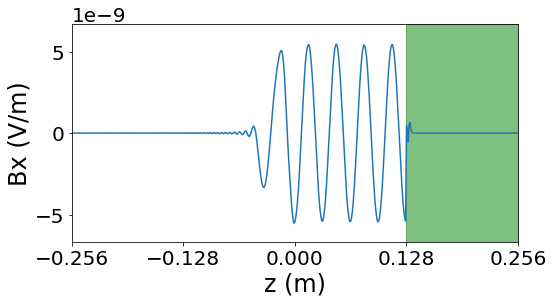

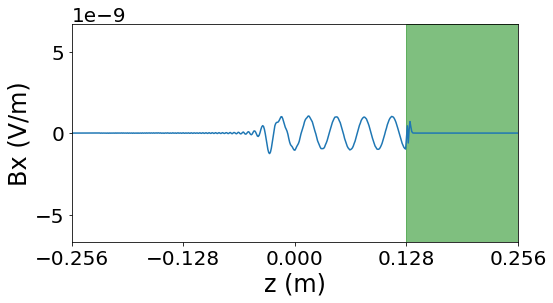

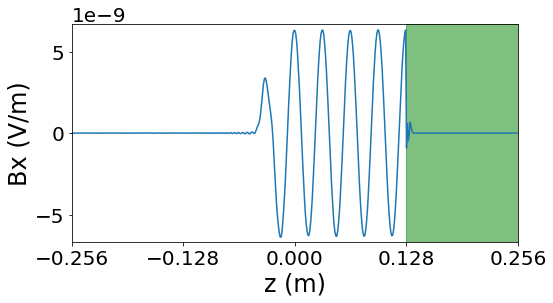

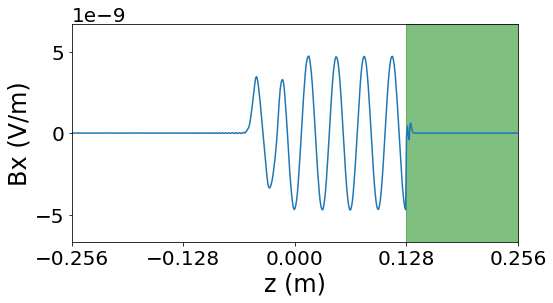

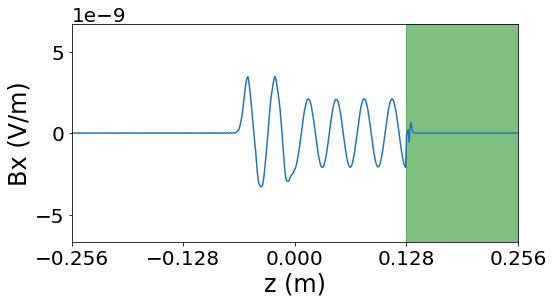

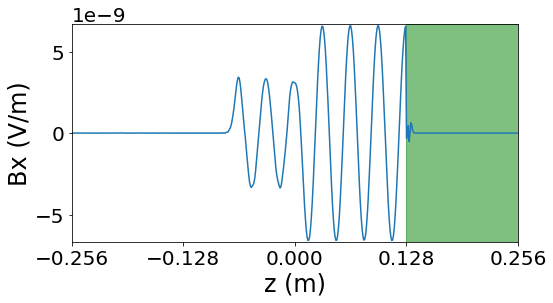

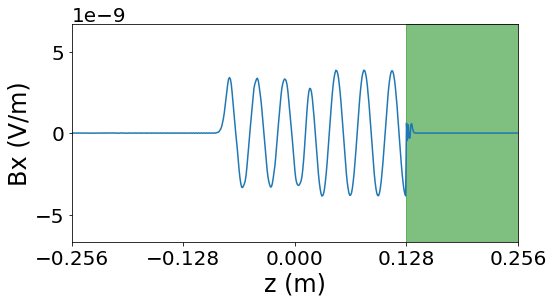

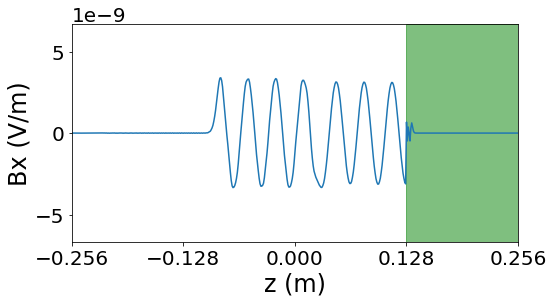

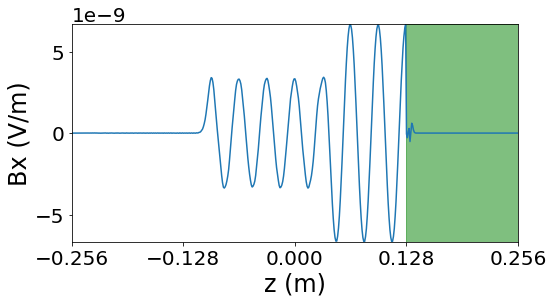

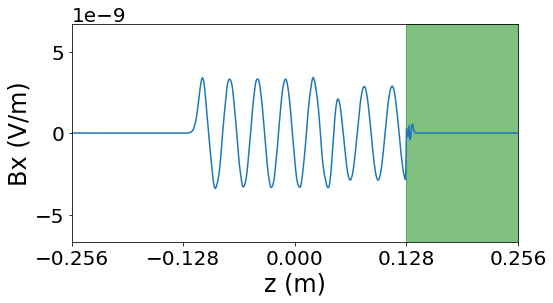

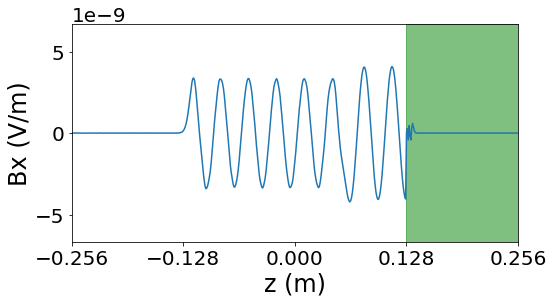

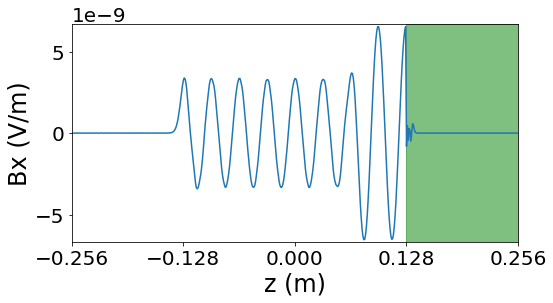

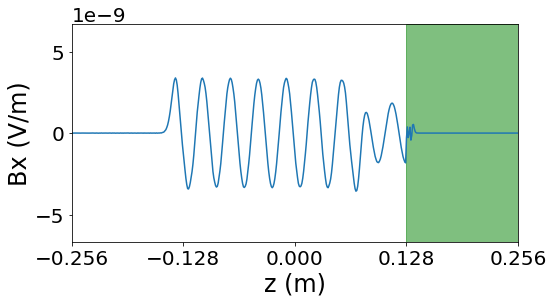

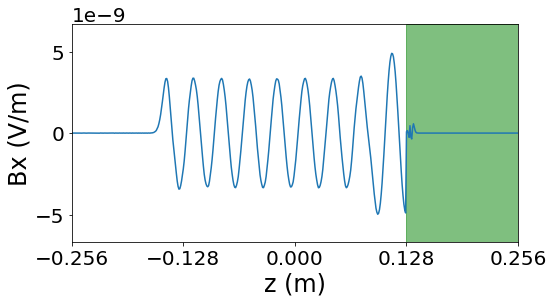

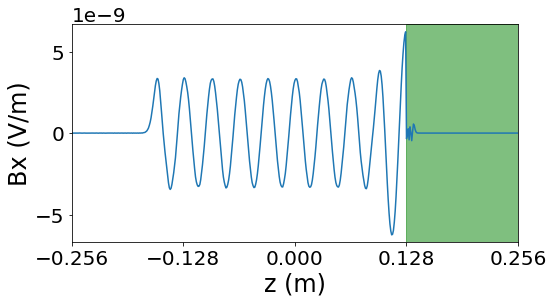

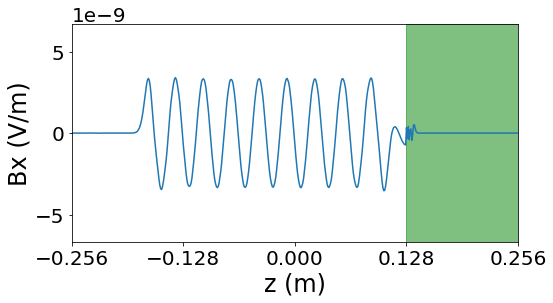

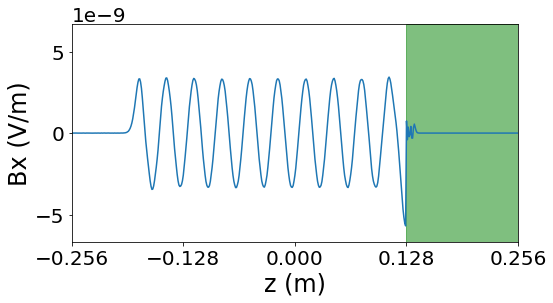

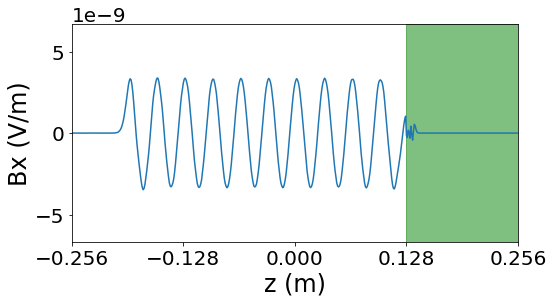

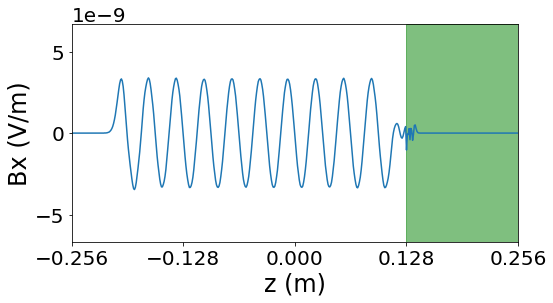

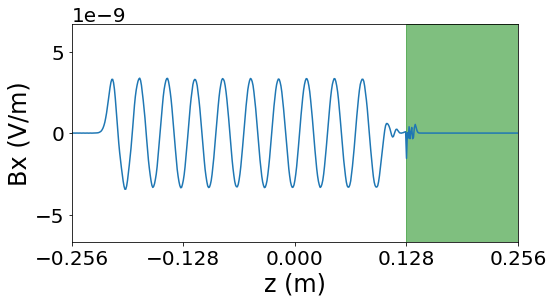

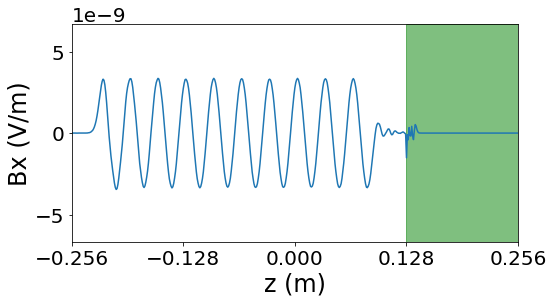

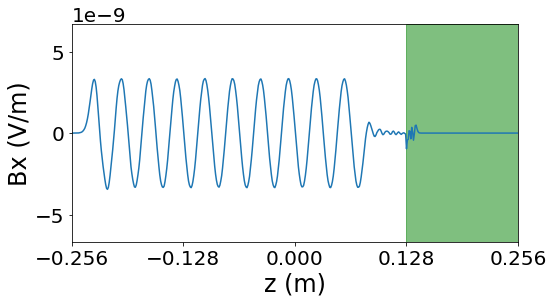

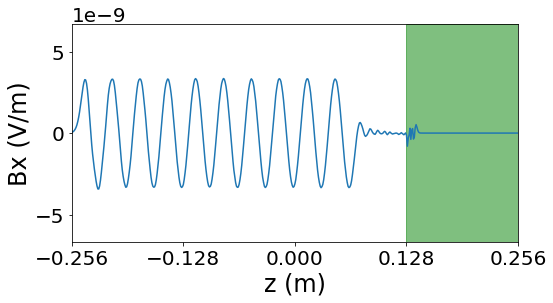

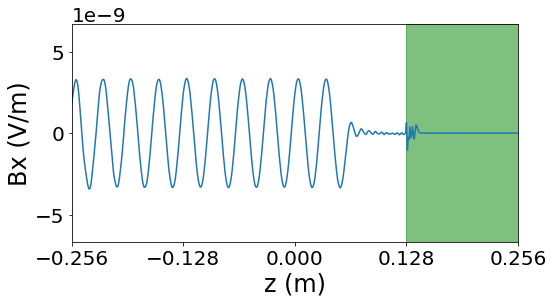

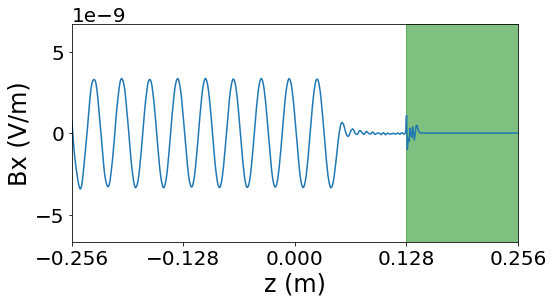

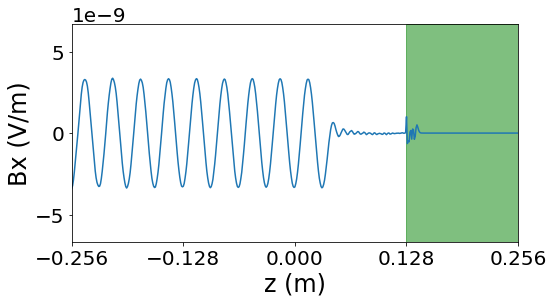

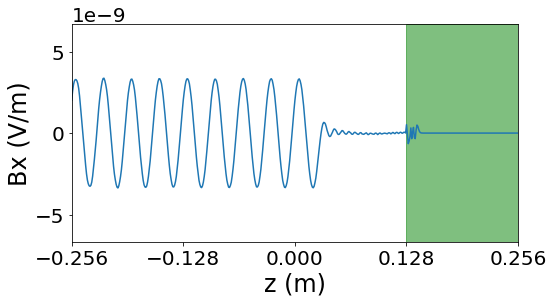

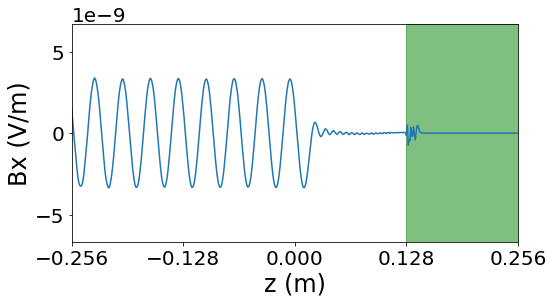

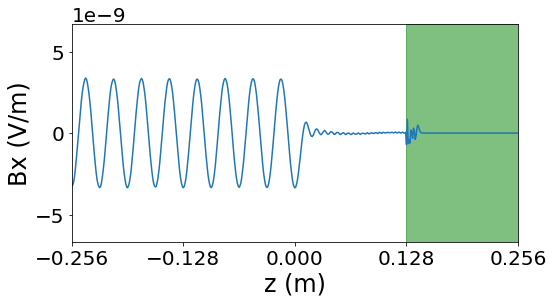

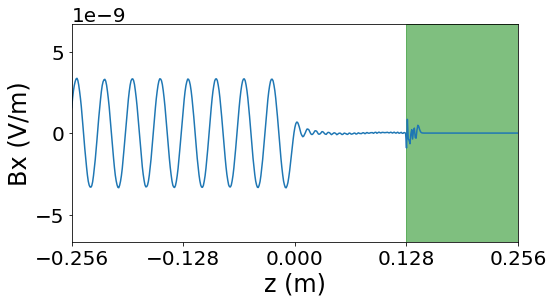

In [5]:
# Import statements
from platform import python_version
print(python_version())
import yt ; 
yt.funcs.mylog.setLevel(50)
import numpy as np
import scipy.constants as scc
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
# example below demonstrates how to save a single NumPy array to CSV format.
# save numpy array as csv file
from numpy import asarray
from numpy import savetxt
plt.rcParams['axes.labelsize'] = 24
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 24
import math
import cmath
import os
#%matplotlib notebook
iteration = 50
dt_iter = 20
while iteration < 1001 :
    ds = yt.load( './diags/diag1'+str(iteration).zfill(5) ) # Create a dataset object\n",
    ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
    xCell = ds.domain_dimensions[0]
    yCell = ds.domain_dimensions[1]
    zCell = ds.domain_dimensions[2]
    z_array = ad0['z'].to_ndarray()
    Bx_array = ad0['Bx'].to_ndarray()
    # save to csv file
    savetxt('Bx_array.csv', Bx_array[int(xCell/2),int(yCell/2),:], delimiter=',')
    savetxt('z_array.csv', z_array[int(xCell/2),int(yCell/2),:]-z_array[int(xCell/2),int(yCell/2),int(zCell/2)], delimiter=',')
    plt.figure(figsize=(8,4))
    plt.plot(z_array[int(xCell/2),int(yCell/2),:]-z_array[int(xCell/2),int(yCell/2),int(zCell/2)],Bx_array[int(xCell/2),int(yCell/2),:])
    plt.ylim(-2/3e8, 2/3e8)
    plt.xlim(-256e-3, 256.000001e-3)
    plt.xticks(np.arange(-256.e-3, 256.000001e-3, step=128.e-3))
    plt.xlabel('z (m)')
    plt.ylabel('Bx (V/m)')
    max_Bx = max(Bx_array[int(xCell/2), int(yCell/2), int(zCell/2):zCell])
    print(max_Bx)
    plt.axvspan(128.e-3, 256.e-3, color='green', alpha=0.5)
    plt.savefig(str(iteration).zfill(5)+'.png',bbox_inches = "tight")
    iteration = iteration + dt_iter
    
wavelength = 32.e-3
mu0 = 4*math.pi*1.e-7
epsilon0 = 8.86e-12
epr = 1
mur = 900
c0 = 1/math.sqrt(mu0*epsilon0)
omega = 2*math.pi*c0/wavelength
sigma = 0 # conductivity of media
gamma = 1j*omega*math.sqrt(mur*epr*mu0*epsilon0)*cmath.sqrt(1-1j*sigma/omega/epr/epsilon0)
eta = 1j*omega*mur*mu0/gamma # intrinsic impedance of media
#eta = math.sqrt(mu0*mur/epr/epsilon0)
c = 1/cmath.sqrt(mu0*mur*(epr*epsilon0-1j*sigma/omega)) #speed of light in media
dt = 1.225592745e-12
#z_obs = 128e-3
#nt = z_obs/c0/dt
nt = 250
z_obs = nt*dt*np.real(c)
z_obs = 0.1
print("speed of light in vacuum", c0)
print("speed of light in media", c)
print("frequency = ", omega/2/math.pi)
print("propagation const = ", gamma)
print("intrinsic impedance = ", eta)
print("tranmission coef = ", 2*eta/(eta+120*math.pi))
print("reflection coef =", (eta-120*math.pi)/(eta+120*math.pi))
print("observation time point", nt)
print("observation point z =", z_obs)
print("attenuation term = ", math.exp(-np.real(gamma)*z_obs))